<p style="font-weight:bold; font-size:200%"> Case Study </p>

- Author: Yichen Luo
- Date: 20220831

In [206]:
import pandas as pd
import threading
import requests
import time as t
import os
import datetime
import re
import string
import random
import numpy as np
import tweepy
import configparser
from web3 import Web3
from hexbytes import HexBytes

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from IPython.core.interactiveshell import InteractiveShell
pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)

RD = '/home/team_defi/02_rdata/'
WD = '/home/team_defi/03_wdata/'
RES = '/home/team_defi/04_result/'
InteractiveShell.ast_node_interactivity = 'all'

# Ethereum

## Frequency

### Root Account

In [167]:
df = pd.read_csv(f'{WD}root_new/list_lp/panel_lp.csv')
df = df.loc[df['chain'] == 'ethereum']
df.groupby(['contractAddress', 'insider_root', 'chain'])['id'].count().reset_index().sort_values('id', ascending=False)

,contractAddress,insider_root,chain,id
175,0x55d1d16fb42fce47b899010c996a3a31f6db8fd6,0x7ab32979418134f358b4fc199a58f1dea0cf0627,ethereum,175
235,0x849ba2278cdae7fa7006c0661fea1c35d5af3336,0x2ee82e0a83282696b96fa8555e4a9823715a4f9c,ethereum,125
381,0xe71221fbfcc55d49363c4a2286424b6dbecc368f,0xff37a2c9c13b1f241864e433cdbd4efa6dc4b8fd,ethereum,49
141,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,ethereum,43
79,0x24861414c8845b8115397302e9dcfaab3f239826,0xd339c520f400276917bda93cd40481ece3c13d61,ethereum,41
...,...,...,...,...
296,0xa58ed557aa014ba59315758140c8876ecd5567f7,0x63554b03852d61fe4e7adacb5ac12d71d9617507,ethereum,1
100,0x36050f5e13e75f002b465fa4aa965ceae705fda5,0xddaf0479269c8e0901c4b0ac8413aa24567ff14f,ethereum,1
298,0xa606b5631546804acf248d96eb0ffebbd5e8bc4b,0x4f1992e910755ee8faf62fe865a880d1a0b8491d,ethereum,1
102,0x36ce7a52cda404b8fa87a98d0d17ec7dd0b144ed,0xa2b734060aec1b708a26cac1023828a73fe24670,ethereum,1


### Layer One

In [164]:
lo = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_no_root.csv')
lo.loc[lo['insider_contractAddress'] == '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782']

,Unnamed: 0,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_layer_one,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3
9103,11075,2263.838465,0x4ec407b32a39b13df47d0a0d6166270815d4961f0baebe4b5a16bc29dfc0a3d1-0,278,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-12 16:18:05,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x4ec407b32a39b13df47d0a0d6166270815d4961f0baebe4b5a16bc29dfc0a3d1,500000.000000,0.000000,0.000000,0.750032,True,uniswapv2_ethereum,ethereum,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,False,2263.838465,0.497458,0.546467,0.684520,NaN,NaN,NaN
9104,11076,450.710211,0x5910910985271fef2e4a3098b1268cfc76699723d1b88bb6ca82c6dff2f35c68-0,115,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-11 13:13:44,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5910910985271fef2e4a3098b1268cfc76699723d1b88bb6ca82c6dff2f35c68,935737.365552,0.000000,0.000000,0.140000,True,uniswapv2_ethereum,ethereum,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,False,450.710211,-0.321556,0.175902,0.224911,NaN,NaN,NaN
9105,11077,1077.364391,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57-0,124,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-18 10:51:34,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57,0.000000,174985.522666,0.354481,0.000000,True,uniswapv2_ethereum,ethereum,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False,-1077.364391,0.291546,0.278823,0.136338,0.036768,0.023575,0.161627
9106,11078,4964.399689,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57-1,129,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-18 10:51:34,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57,0.000000,810000.000000,1.633416,0.000000,True,uniswapv2_ethereum,ethereum,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False,-4964.399689,0.291546,0.278823,0.136338,0.036768,0.023575,0.161627
9107,11079,1656.930526,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c-0,239,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-12 01:18:57,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c,0.000000,285686.928382,0.519685,0.000000,True,uniswapv2_ethereum,ethereum,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False,-1656.930526,0.497458,0.546467,0.684520,NaN,NaN,NaN
9108,11080,3632.976370,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c-1,244,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-12 01:18:57,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c,0.000000,630000.000000,1.139458,0.000

## Root List

In [165]:
chain = 'ethereum'
lst = pd.read_csv(f'/home/yichen/team_defi/04_result/insider_trading/root_list/root_list_final/root_{chain}.csv')
lst.loc[lst['contractAddress'] == '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782']

,root,tokenName,tokenSymbol,contractAddress
46,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,Doont Buy,DBUY,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782
47,0x19713aabd20ca4463e3bcfeb9ed559868239245d,Doont Buy,DBUY,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782
48,0x56d2ee8eef4afc6f6fde704469c244ee17ba7693,Doont Buy,DBUY,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782
49,0x5bad3488d11346a3d71f52d8da99baa008769356,Doont Buy,DBUY,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782
714,0x6abacc140c7d85830276bfabc84d671cbdc1b159,Doont Buy,DBUY,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782
715,0x225fe0499c0c1f08901b2878d58c522140ed18f1,Doont Buy,DBUY,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782
716,0xed19ff11aeebfd40f2062314a84e38f0d2f6b7d9,Doont Buy,DBUY,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782
717,0xbf1803a46078c1c2a33ae4b3fbb18aacd705dbd8,Doont Buy,DBUY,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782
718,0xba6f68aef9fe1795944989f66e6815e8e6627e1b,Doont Buy,DBUY,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782
730,0xd2960c3c1adeef99edb82ba0c11b75994f87f2ac,Doont Buy,DBUY,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782


## Root Transaction

In [169]:
df.loc[df['insider_root'] == '0x638af69053892cdd7ad295fc2482d1a11fe5a9b7']
df.loc[df['insider_root'] == '0x638af69053892cdd7ad295fc2482d1a11fe5a9b7'].shape[0]

,Unnamed: 0,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_root,contractAddress,from,to,lp
162,162,218.613309,0x0eaeb2242bf22991ff987bba85b51f9c6a4f9e610c7ef6e03c153310928ea502-0,116,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-11 12:18:08,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0eaeb2242bf22991ff987bba85b51f9c6a4f9e610c7ef6e03c153310928ea502,927313.431038,0.000000e+00,0.000000,0.068,True,uniswapv2_ethereum,ethereum,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,False
163,163,208.930289,0x1883388ea98648885208d978076020f29aba270784e94f283d365e0250a4fc01-0,6,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-11 12:17:39,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1883388ea98648885208d978076020f29aba270784e94f283d365e0250a4fc01,917682.836797,0.000000e+00,0.000000,0.065,True,uniswapv2_ethereum,ethereum,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,False
164,164,10930.678532,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35-0,196,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-24 15:28:22,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35,0.000000,5.000257e+05,3.381181,0.000,True,uniswapv2_ethereum,ethereum,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False
165,165,1369.529838,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35-1,201,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-24 15:28:22,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35,0.000000,6.300000e+04,0.423636,0.000,True,uniswapv2_ethereum,ethereum,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False
166,166,183.218109,0x28208c4f7974378502fb44638972493b55773e608ddc12a5e079ad4d15a409da-0,134,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-11 12:15:27,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x28208c4f7974378502fb44638972493b55773e608ddc12a5e079ad4d15a409da,950060.432742,0.000000e+00,0.000000,0.057,True,uniswapv2_ethereum,ethereum,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,False
167,167,151.122696,0x2899461030071aab53cca2a3634d6630216a950e6193b654a6ff2f04c5abf340-0,315,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-11 12:12:16,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x2899461030071aab53cca2a3634d6630216a950e6193b654a6ff2f04c5abf340,947267.736648,0.000000e+00,0.000000,0.047,True,uniswapv2_ethereum,ethereum,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,False
168,168,812.848415,0x291768cbf7c19c2f6854013de9cbf8969a90ddf037eff010ef89a802d2315da8-0,189,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021

43

## Case: Doont Buy

- Coingecko和Etherscan两个平台均有Doont Buy的信息

### Root Account

### Insider Trading

In [170]:
chain = 'ethereum'
dfs = []
for dex in chain_info(chain):
    dex
    try:
        df = insider_transaction(address='0x638af69053892cdd7ad295fc2482d1a11fe5a9b7',
                                 dex=dex)
        df['dex'] = dex
        df['chain'] = chain
        dfs.append(df)
        print(f'{dex} have {len(df)} swap records.')
    except Exception as e:
        print(f'{dex} no swap records.')
        
if len(dfs)!=0: 
    dfs = pd.concat(dfs)
else: 
    print(f'No swap data')
    
dfs

'uniswapv3_ethereum'

uniswapv3_ethereum no swap records.


'uniswapv2_ethereum'

uniswapv2_ethereum have 897 swap records.


'sushiswap_ethereum'

sushiswap_ethereum have 10 swap records.


,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain
0,3526060.455862347,476218619.617107537,0.15,0,405.0063846215624852586842795793584,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x016380b87a1f2c1a1d7a1ebea4ecc6260bf5ee688b1f7161c1696cc6b19536ac-0,144,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-06-04 18:29:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,MuskRat,Wrapped Ether,0xb7b3cd5f5d5c9b7f04a2e78eb89f836547e7d252,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x016380b87a1f2c1a1d7a1ebea4ecc6260bf5ee688b1f7161c1696cc6b19536ac,uniswapv2_ethereum,ethereum
1,0.307101386940417619,0,0,0.036365348070640292,26.55112552845994290763798718979844,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x01b5b592d00323c6cd8d9a6ee077ab019960e87a01b4b56d4049811f61ddeed4-0,304,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2020-12-28 15:38:13,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Cover Protocol,Wrapped Ether,0x5d8d9f5b96f4438195be9b99eee6118ed4304286,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x01b5b592d00323c6cd8d9a6ee077ab019960e87a01b4b56d4049811f61ddeed4,uniswapv2_ethereum,ethereum
2,40630.731061104,2900000,0.059455706270344241,0,118.1519624570521543716191305443943,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x01b977d2e5a7fdc51057ddb2b152a66c132825705cfe713c78f6378687592198-0,54,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-07-13 14:29:55,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,EVERGLOW INU,Wrapped Ether,0xa027a86192210c5cf9f3295d981209a620289cfb,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x01b977d2e5a7fdc51057ddb2b152a66c132825705cfe713c78f6378687592198,uniswapv2_ethereum,ethereum
3,514134859900.478952813,222109569777321.044541516,0.3,0,817.204651470969550394412492590068,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x01cde636c00ee8159f18f5f0c45e2cec6fe735b6348b14a8c44f0152d50eaf4a-0,82,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-05-26 17:00:21,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Hina Inu,Wrapped Ether,0xbd0a4bf098261673d5e6e600fd87ddcd756e6764,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x01cde636c00ee8159f18f5f0c45e2cec6fe735b6348b14a8c44f0152d50eaf4a,uniswapv2_ethereum,ethereum
4,666666666666.666666666,0,0,0.001201006714355834,3.32279884818090140954721499695265,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x01df109a76a7bb73aa3d99a80685285d202452f3e7c2544bd3a6ca6df1a11577-0,38,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-06-02 19:29:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Nature Boy Inu,Wrapped Ether,0xbf820fbb448c564b456ce376cbfbe341b84d1a58,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x01df109a76a7bb73aa3d99a80685285d202452f3e7c2544bd3a6ca6df1a11577,uniswapv2_ethereum,ethereum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0,20.732756571509234088,21.723119,0,21.73221661524133688288490915852097,NaN,0x8e2f227dca99a2a7b4c7a98d1d80fe25b9b2e3da16fccb950732aa3244833e80-1,159,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-01-12 13:07:25,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,MIC,Tether USD,0x368b3a58b5f49392e5c9e4c998cb0bb966752e51,0xdac17f958d2ee523a2206206994597c13d831ec7,0x8e2f227dca99a2a7b4c7a98d1d80fe25b9b2e3da16fccb950732aa3244833e80,sushiswap_ethereum,ethereum
6,971.043699481215246919,0,0,15.09724612,971.4037882488240600051125496837181,NaN,0x9e34bce888943c084b820a292233222fdcc55940f34bc26bff3128e424726c93-2,30,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-01-11 03:12:55,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,Dai Stablecoin,SushiswapV2 IL Protection,0x6b175474e89094c44da98b954eedeac495271d0f,0xbcda9e0658f4eecf56a0bd099e6dbc0c91f6a8c2,0x9e34bce888943c084b820a292233222fdcc55940f34bc26bff3128e424726c93,sushiswap_ethereum,ethereum
7,0,1010,917.698208,0,916.112143631403842837516124340354,NaN,0xb081cee194d5f0e97d69903625656e1d4af6835936448e2fc3451a5db8e0f46c-0,144,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-01-21 12:48:50,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,MIC,Tether USD,0x368

In [171]:
dfs.loc[(dfs['token0_id']!= '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782')&
        (dfs['token1_id']!= '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782')]

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain
0,3526060.455862347,476218619.617107537,0.15,0,405.0063846215624852586842795793584,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x016380b87a1f2c1a1d7a1ebea4ecc6260bf5ee688b1f7161c1696cc6b19536ac-0,144,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-06-04 18:29:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,MuskRat,Wrapped Ether,0xb7b3cd5f5d5c9b7f04a2e78eb89f836547e7d252,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x016380b87a1f2c1a1d7a1ebea4ecc6260bf5ee688b1f7161c1696cc6b19536ac,uniswapv2_ethereum,ethereum
1,0.307101386940417619,0,0,0.036365348070640292,26.55112552845994290763798718979844,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x01b5b592d00323c6cd8d9a6ee077ab019960e87a01b4b56d4049811f61ddeed4-0,304,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2020-12-28 15:38:13,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Cover Protocol,Wrapped Ether,0x5d8d9f5b96f4438195be9b99eee6118ed4304286,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x01b5b592d00323c6cd8d9a6ee077ab019960e87a01b4b56d4049811f61ddeed4,uniswapv2_ethereum,ethereum
2,40630.731061104,2900000,0.059455706270344241,0,118.1519624570521543716191305443943,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x01b977d2e5a7fdc51057ddb2b152a66c132825705cfe713c78f6378687592198-0,54,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-07-13 14:29:55,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,EVERGLOW INU,Wrapped Ether,0xa027a86192210c5cf9f3295d981209a620289cfb,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x01b977d2e5a7fdc51057ddb2b152a66c132825705cfe713c78f6378687592198,uniswapv2_ethereum,ethereum
3,514134859900.478952813,222109569777321.044541516,0.3,0,817.204651470969550394412492590068,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x01cde636c00ee8159f18f5f0c45e2cec6fe735b6348b14a8c44f0152d50eaf4a-0,82,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-05-26 17:00:21,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Hina Inu,Wrapped Ether,0xbd0a4bf098261673d5e6e600fd87ddcd756e6764,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x01cde636c00ee8159f18f5f0c45e2cec6fe735b6348b14a8c44f0152d50eaf4a,uniswapv2_ethereum,ethereum
4,666666666666.666666666,0,0,0.001201006714355834,3.32279884818090140954721499695265,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x01df109a76a7bb73aa3d99a80685285d202452f3e7c2544bd3a6ca6df1a11577-0,38,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-06-02 19:29:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Nature Boy Inu,Wrapped Ether,0xbf820fbb448c564b456ce376cbfbe341b84d1a58,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x01df109a76a7bb73aa3d99a80685285d202452f3e7c2544bd3a6ca6df1a11577,uniswapv2_ethereum,ethereum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0,20.732756571509234088,21.723119,0,21.73221661524133688288490915852097,NaN,0x8e2f227dca99a2a7b4c7a98d1d80fe25b9b2e3da16fccb950732aa3244833e80-1,159,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-01-12 13:07:25,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,MIC,Tether USD,0x368b3a58b5f49392e5c9e4c998cb0bb966752e51,0xdac17f958d2ee523a2206206994597c13d831ec7,0x8e2f227dca99a2a7b4c7a98d1d80fe25b9b2e3da16fccb950732aa3244833e80,sushiswap_ethereum,ethereum
6,971.043699481215246919,0,0,15.09724612,971.4037882488240600051125496837181,NaN,0x9e34bce888943c084b820a292233222fdcc55940f34bc26bff3128e424726c93-2,30,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-01-11 03:12:55,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,Dai Stablecoin,SushiswapV2 IL Protection,0x6b175474e89094c44da98b954eedeac495271d0f,0xbcda9e0658f4eecf56a0bd099e6dbc0c91f6a8c2,0x9e34bce888943c084b820a292233222fdcc55940f34bc26bff3128e424726c93,sushiswap_ethereum,ethereum
7,0,1010,917.698208,0,916.112143631403842837516124340354,NaN,0xb081cee194d5f0e97d69903625656e1d4af6835936448e2fc3451a5db8e0f46c-0,144,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-01-21 12:48:50,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,MIC,Tether USD,0x368

### Home Token

In [172]:
dfs = home_token_filter(df=dfs,
                        insider_contractAddress='0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782')
dfs = dfs.loc[dfs['home_token'] == True]
dfs

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain,home_token
44,0,927313.431037734,0.068,0,218.6133088763625364165582773495611,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x0eaeb2242bf22991ff987bba85b51f9c6a4f9e610c7ef6e03c153310928ea502-0,116,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:18:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0eaeb2242bf22991ff987bba85b51f9c6a4f9e610c7ef6e03c153310928ea502,uniswapv2_ethereum,ethereum,True
83,0,917682.83679733,0.065,0,208.9302885271010141909583220352553,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x1883388ea98648885208d978076020f29aba270784e94f283d365e0250a4fc01-0,6,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:17:39,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1883388ea98648885208d978076020f29aba270784e94f283d365e0250a4fc01,uniswapv2_ethereum,ethereum,True
135,500025.682593,0,0,3.381181385157690414,10930.67853202550625912629898510866,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35-0,196,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 15:28:22,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35,uniswapv2_ethereum,ethereum,True
136,63000,0,0,0.423635987578085888,1369.529838044239005456845567480478,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35-1,201,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 15:28:22,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35,uniswapv2_ethereum,ethereum,True
147,0,950060.432742433,0.057,0,183.2181092456746840393113319294941,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x28208c4f7974378502fb44638972493b55773e608ddc12a5e079ad4d15a409da-0,134,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:15:27,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x28208c4f7974378502fb44638972493b55773e608ddc12a5e079ad4d15a409da,uniswapv2_ethereum,ethereum,True
150,0,947267.73664769,0.047,0,151.1226964904576793128891037177189,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x2899461030071aab53cca2a3634d6630216a950e6193b654a6ff2f04c5abf340-0,315,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:12:16,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x2899461030071aab53cca2a3634d6630216a950e6193b654a6ff2f04c5abf340,uniswapv2_ethereum,ethereum,True
151,27536.057065739,0,0,0.257517716655303319,812.8484150534892368591669937747578,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x291768cbf7c19c2f6854013de9cbf8969a90ddf037eff010ef89a802d2315da8-0,189,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-26 03:52:59,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x291768cbf7c19c2f6854013de9cbf8969a90ddf037eff010ef89a802d2315da8,uniswapv2_ethereum,ethereum,True
152,378000,0,0,3.518509291517144774,11106.08908042206081171650048607271,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x291768cbf7c19c2f6854013de9cbf8969a90ddf037eff010ef89a802d2315da8-1,194,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-26 03:52:59,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped E

### Liquidity Provision

In [173]:
total = dfs.shape[0]
num = 0
dfs['lp'] = np.nan

for idx, row in dfs.iterrows():
    num += 1
    
    transaction_id = row['transaction_id']
    chain = row['chain']
    try:
        status = liquidity_provision(transaction_id, chain)
        if status == True:
            dfs.loc[dfs['transaction_id'] == transaction_id, 'lp'] = True
            print(f'{transaction_id} is lp, {num}/{total}.')

        else:
            dfs.loc[dfs['transaction_id'] == transaction_id, 'lp'] = False
            print(f'{transaction_id} is not lp, {num}/{total}.')
    except Exception as e:
        print(f'error:{e}')

/tmp/ipykernel_166272/598886098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['lp'] = np.nan
/tmp/ipykernel_166272/598886098.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.loc[dfs['transaction_id'] == transaction_id, 'lp'] = False


0x0eaeb2242bf22991ff987bba85b51f9c6a4f9e610c7ef6e03c153310928ea502 is not lp, 1/43.
0x1883388ea98648885208d978076020f29aba270784e94f283d365e0250a4fc01 is not lp, 2/43.
0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35 is not lp, 3/43.
0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35 is not lp, 4/43.
0x28208c4f7974378502fb44638972493b55773e608ddc12a5e079ad4d15a409da is not lp, 5/43.
0x2899461030071aab53cca2a3634d6630216a950e6193b654a6ff2f04c5abf340 is not lp, 6/43.
0x291768cbf7c19c2f6854013de9cbf8969a90ddf037eff010ef89a802d2315da8 is not lp, 7/43.
0x291768cbf7c19c2f6854013de9cbf8969a90ddf037eff010ef89a802d2315da8 is not lp, 8/43.
0x41cd35b9dd1bf0d18c8c4e9baa445f9d9971c9536e2f7ee90d199e267d5251a1 is not lp, 9/43.
0x43b3c42e79024e4055cee9e5a640c4389e27f963b93079516fae7ebb73f2f250 is not lp, 10/43.
0x461696b54a8e692ef33523a7e7aededf04289859ff46b4316cf78469f4f6e1e3 is not lp, 11/43.
0x461696b54a8e692ef33523a7e7aededf04289859ff46b4316cf78469f4f6e1e3 is not 

In [174]:
dfs = dfs.loc[dfs['lp'] == False]
dfs

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain,home_token,lp
44,0,927313.431037734,0.068,0,218.6133088763625364165582773495611,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x0eaeb2242bf22991ff987bba85b51f9c6a4f9e610c7ef6e03c153310928ea502-0,116,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:18:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0eaeb2242bf22991ff987bba85b51f9c6a4f9e610c7ef6e03c153310928ea502,uniswapv2_ethereum,ethereum,True,False
83,0,917682.83679733,0.065,0,208.9302885271010141909583220352553,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x1883388ea98648885208d978076020f29aba270784e94f283d365e0250a4fc01-0,6,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:17:39,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1883388ea98648885208d978076020f29aba270784e94f283d365e0250a4fc01,uniswapv2_ethereum,ethereum,True,False
135,500025.682593,0,0,3.381181385157690414,10930.67853202550625912629898510866,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35-0,196,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 15:28:22,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35,uniswapv2_ethereum,ethereum,True,False
136,63000,0,0,0.423635987578085888,1369.529838044239005456845567480478,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35-1,201,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 15:28:22,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35,uniswapv2_ethereum,ethereum,True,False
147,0,950060.432742433,0.057,0,183.2181092456746840393113319294941,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x28208c4f7974378502fb44638972493b55773e608ddc12a5e079ad4d15a409da-0,134,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:15:27,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x28208c4f7974378502fb44638972493b55773e608ddc12a5e079ad4d15a409da,uniswapv2_ethereum,ethereum,True,False
150,0,947267.73664769,0.047,0,151.1226964904576793128891037177189,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x2899461030071aab53cca2a3634d6630216a950e6193b654a6ff2f04c5abf340-0,315,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:12:16,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x2899461030071aab53cca2a3634d6630216a950e6193b654a6ff2f04c5abf340,uniswapv2_ethereum,ethereum,True,False
151,27536.057065739,0,0,0.257517716655303319,812.8484150534892368591669937747578,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x291768cbf7c19c2f6854013de9cbf8969a90ddf037eff010ef89a802d2315da8-0,189,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-26 03:52:59,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x291768cbf7c19c2f6854013de9cbf8969a90ddf037eff010ef89a802d2315da8,uniswapv2_ethereum,ethereum,True,False
152,378000,0,0,3.518509291517144774,11106.08908042206081171650048607271,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x291768cbf7c19c2f6854013de9cbf8969a90ddf037eff010ef89a802d2315da8-1,194,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-26 03:52:59,0x7a250d5630b4cf5

### Variables

In [181]:
for key in ['amount0In', 'amount0Out', 'amount1In', 'amount1Out', 'amountUSD']:
    dfs[key] = dfs[key].astype('float')
dfs['insider_contractAddress'] = '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782'
dfs = buy(df=dfs)
dfs

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain,home_token,lp,insider_contractAddress,buy
44,0.000000e+00,927313.431038,0.068,0.000000,218.613309,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x0eaeb2242bf22991ff987bba85b51f9c6a4f9e610c7ef6e03c153310928ea502-0,116,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:18:08,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0eaeb2242bf22991ff987bba85b51f9c6a4f9e610c7ef6e03c153310928ea502,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,218.613309
83,0.000000e+00,917682.836797,0.065,0.000000,208.930289,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x1883388ea98648885208d978076020f29aba270784e94f283d365e0250a4fc01-0,6,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:17:39,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1883388ea98648885208d978076020f29aba270784e94f283d365e0250a4fc01,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,208.930289
135,5.000257e+05,0.000000,0.000,3.381181,10930.678532,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35-0,196,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 15:28:22,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,-10930.678532
136,6.300000e+04,0.000000,0.000,0.423636,1369.529838,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35-1,201,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-24 15:28:22,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x261aece1c13d71a4925e81d05a8edb8b0ebd82e02efe7035575fa70744d98e35,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,-1369.529838
147,0.000000e+00,950060.432742,0.057,0.000000,183.218109,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x28208c4f7974378502fb44638972493b55773e608ddc12a5e079ad4d15a409da-0,134,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:15:27,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x28208c4f7974378502fb44638972493b55773e608ddc12a5e079ad4d15a409da,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,183.218109
150,0.000000e+00,947267.736648,0.047,0.000000,151.122696,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x2899461030071aab53cca2a3634d6630216a950e6193b654a6ff2f04c5abf340-0,315,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,2021-08-11 12:12:16,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x2899461030071aab53cca2a3634d6630216a950e6193b654a6ff2f04c5abf340,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,151.122696
151,2.753606e+04,0.000000,0.000,0.257518,812.848415,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x291768cbf7c19c2f6854013de9cbf8969a90ddf037eff010ef89a802d2315da8-0,189,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-26 03:52:59,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x291768cbf7c19c2f6854013de9cbf8969a90ddf037eff010ef89a802d2315da8,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49a

In [182]:
for after in [True, False]:
    for day in [1, 2, 3]:
        if after == True: dfs[f'ret_{str(day)}'] = np.nan
        if after == False: dfs[f'ret_-{str(day)}'] = np.nan
total = dfs.shape[0]
num = 0

for idx, row in dfs.iterrows():
    try:
        num += 1
        insider_contractAddress = row['insider_contractAddress']
        timestamp = row['timestamp']
        index = row['id']
        chain = row['chain']
        print(f'{num}/{total}')
        for after in [True, False]:
            for day in [1, 2, 3]:
                
                if after == True: dfs.loc[dfs['id'] == index, f'ret_{str(day)}'] = token_return(after=after, 
                                                                                              day=day, 
                                                                                              contract=insider_contractAddress, 
                                                                                              chain=chain,
                                                                                              timestamp=timestamp)
                if after == False: dfs.loc[dfs['id'] == index, f'ret_-{str(day)}'] = token_return(after=after, 
                                                                                              day=day, 
                                                                                              contract=insider_contractAddress, 
                                                                                              chain=chain,
                                                                                              timestamp=timestamp)
    except Exception as e:
        print(f'{num}/{total}:Error{e}')

1/43
2/43
3/43
4/43
5/43
6/43
7/43
8/43
9/43
10/43
11/43
12/43
13/43
14/43
15/43
16/43
17/43
18/43
19/43
20/43
21/43
22/43
23/43
24/43
25/43
26/43
27/43
28/43
29/43
30/43
31/43
32/43
33/43
34/43
35/43
36/43
37/43
38/43
39/43
40/43
41/43
42/43
43/43


In [183]:
dfs.sample(3)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain,home_token,lp,insider_contractAddress,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3
840,2.088000e+05,0.0,0.0,1.622331,5238.382816,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0xf0696aacb53ce657fb5958f81d0629a533a5f99b6d900d0372a8a1408da97789-1,177,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-31 04:04:07,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xf0696aacb53ce657fb5958f81d0629a533a5f99b6d900d0372a8a1408da97789,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,-5238.382816,-0.446139,-0.550740,-0.356772,0.010356,-0.155672,0.006870
251,1.271773e+06,0.0,0.0,1.729063,5589.540350,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x461696b54a8e692ef33523a7e7aededf04289859ff46b4316cf78469f4f6e1e3-1,390,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-11 18:56:13,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x461696b54a8e692ef33523a7e7aededf04289859ff46b4316cf78469f4f6e1e3,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,-5589.540350,-0.321556,0.175902,0.224911,NaN,NaN,NaN
393,2.938892e+05,0.0,0.0,5.469409,21492.107845,0x638af69053892cdd7ad295fc2482d1a11fe5a9b7,0x6c338eb49341d049fd51a5be3a6bad5050c209af3690e73ebd166adf996f862a-0,80,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-09-06 17:53:34,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x6c338eb49341d049fd51a5be3a6bad5050c209af3690e73ebd166adf996f862a,uniswapv2_ethereum,ethereum,True,False,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,-21492.107845,-0.383821,-0.397042,-0.274573,-0.023705,-0.096590,0.097378


### Return Analysis

#### DEX return

5

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.46323163, -0.45323163, -0.44323163, -0.43323163, -0.42323163,
        -0.41323163, -0.40323163, -0.39323163, -0.38323163, -0.37323163,
        -0.36323163, -0.35323163, -0.34323163, -0.33323163, -0.32323163,
        -0.31323163, -0.30323163, -0.29323163, -0.28323163, -0.27323163,
        -0.26323163, -0.25323163, -0.24323163, -0.23323163, -0.22323163,
        -0.21323163, -0.20323163, -0.19323163, -0.18323163, -0.17323163,
        -0.16323163, -0.15323163, -0.14323163, -0.13323163, -0.12323163,
        -0.11323163, -0.10323163, -0.09

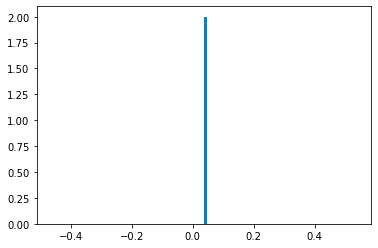

count    2.000000
mean     0.036768
std      0.000000
min      0.036768
25%      0.036768
50%      0.036768
75%      0.036768
max      0.036768
Name: ret_-1, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.46323163, -0.45323163, -0.44323163, -0.43323163, -0.42323163,
        -0.41323163, -0.40323163, -0.39323163, -0.38323163, -0.37323163,
        -0.36323163, -0.35323163, -0.34323163, -0.33323163, -0.32323163,
        -0.31323163, -0.30323163, -0.29323163, -0.28323163, -0.27323163,
        -0.26323163, -0.25323163, -0.24323163, -0.23323163, -0.22323163,
        -0.21323163, -0.20323163, -0.19323163, -0.18323163, -0.17323163,
        -0.16323163, -0.15323163, -0.14323163, -0.13323163, -0.12323163,
        -0.11323163, -0.10323163, -0.09

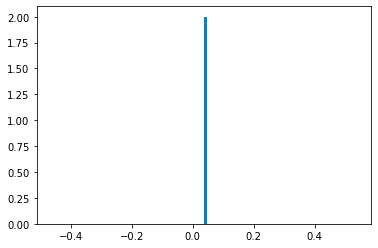

count    2.000000
mean     0.036768
std      0.000000
min      0.036768
25%      0.036768
50%      0.036768
75%      0.036768
max      0.036768
Name: ret_-1, dtype: float64

In [236]:
ret_class = 'ret_-1'

dfg = dfs.copy()
dfg = dfg.loc[dfg['amountUSD'] > 1000]
dfg.shape[0]
fig, ax = plt.subplots()
ax.hist(dfg[ret_class].values, bins=100)
plt.show()
dfg[ret_class].describe()

# dfg = dfs.loc[(dfs['buy']>0)]
# dfg = dfg.loc[dfg['amountUSD'] > 1000]
# buy = dfg['buy'].values
# ret = dfg[ret_class].values
# fig, ax = plt.subplots()
# ax.hist(ret,bins=100)
# plt.show()
# dfs.loc[(dfs['buy'] >0)][ret_class].describe()

dfg = dfs.loc[(dfs['buy']<0)]
dfg = dfg.loc[dfg['amountUSD'] > 1000]
buy = dfg['buy'].values
ret = dfg[ret_class].values
fig, ax = plt.subplots()
ax.hist(ret,bins=100)
plt.show()
dfs.loc[(dfs['buy'] <0)][ret_class].describe()

In [185]:
contractAddress = '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782'
dex = 'uniswapv2_ethereum'
csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 

csv['priceUSD'] = csv['priceUSD'].astype('float')
csv['date'] = pd.to_datetime(csv['date'])
csv.sort_values(['date'], ascending=True, inplace=True)
price = csv['priceUSD'].values
date = csv['date'].values

buys = dfs.loc[dfs['buy'] > 0, 'timestamp'].dt.strftime('%Y-%m-%d').values
sells = dfs.loc[dfs['buy'] < 0, 'timestamp'].dt.strftime('%Y-%m-%d').values

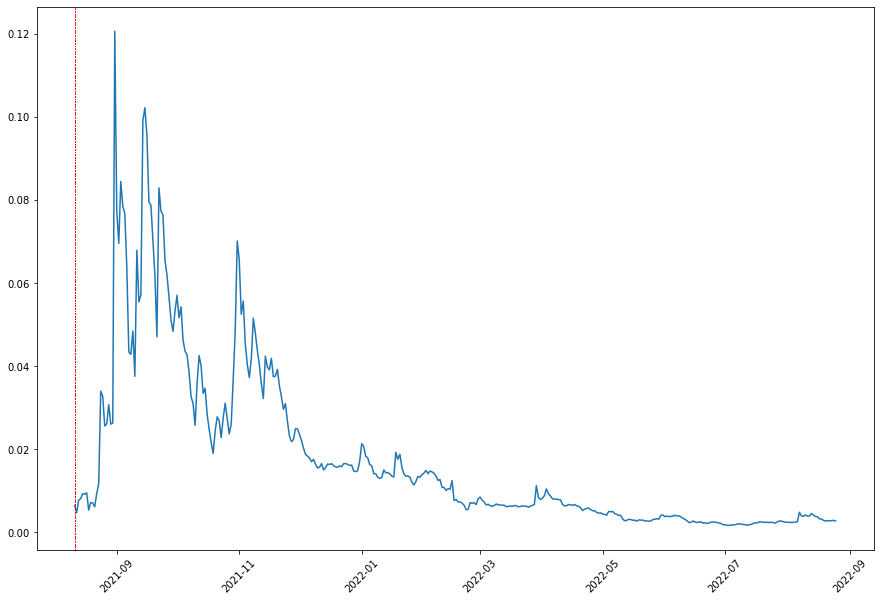

In [186]:
fig, ax = plt.subplots(figsize=(15,10))

_ = ax.plot(date, price)
_ = plt.xticks(rotation=45)

for buy in buys:
    _ = plt.axvline(x=pd.to_datetime(buy), color='red', linestyle='dotted', linewidth=1)
     
plt.show()

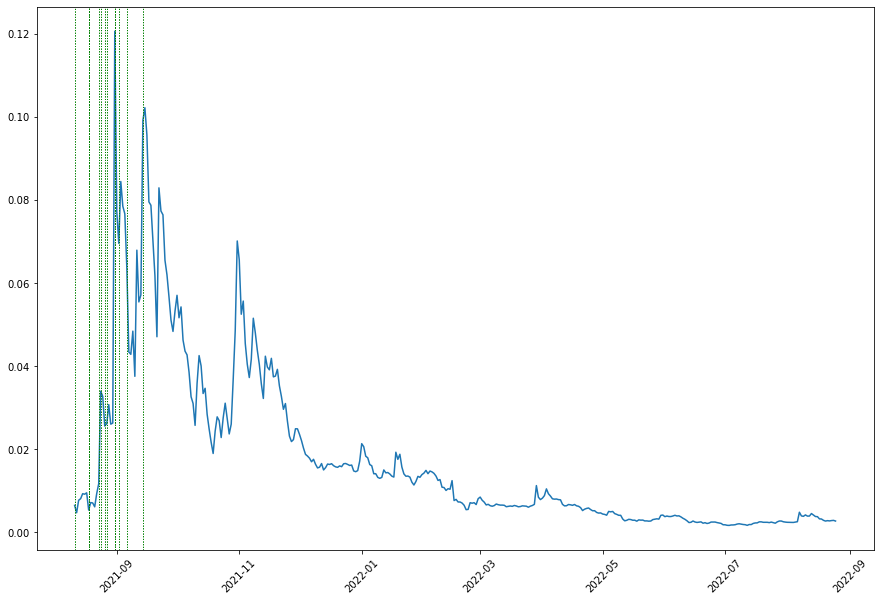

In [187]:
fig, ax = plt.subplots(figsize=(15,10))

_ = ax.plot(date, price)
_ = plt.xticks(rotation=45)

for sell in sells:
    _ = plt.axvline(x=pd.to_datetime(sell), color='green', linestyle='dotted', linewidth=1)

#### CEX return

In [188]:
prc = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_price.csv')
prc['timestamp'] = pd.to_datetime(prc['timestamp'])
prc.sort_values(['insider_tokenSymbol', 'timestamp'], ascending=True, inplace=True)
price = prc.loc[prc['insider_contractAddress'] == '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782', 'usd'].values
time = prc.loc[prc['insider_contractAddress'] == '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782', 'timestamp'].values

buys = dfs.loc[dfs['buy'] > 0, 'timestamp'].dt.strftime('%Y-%m-%d').values
sells = dfs.loc[dfs['buy'] < 0, 'timestamp'].dt.strftime('%Y-%m-%d').values

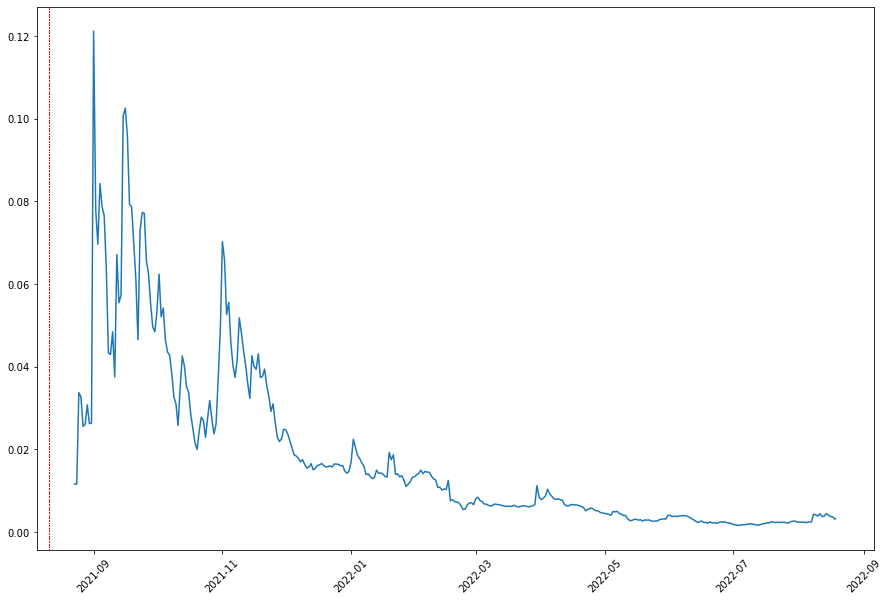

In [189]:
fig, ax = plt.subplots(figsize=(15,10))

_ = ax.plot(time, price)
_ = plt.xticks(rotation=45)

for buy in buys:
    _ = plt.axvline(x=pd.to_datetime(buy), color='red', linestyle='dotted', linewidth=1)
     
plt.show()

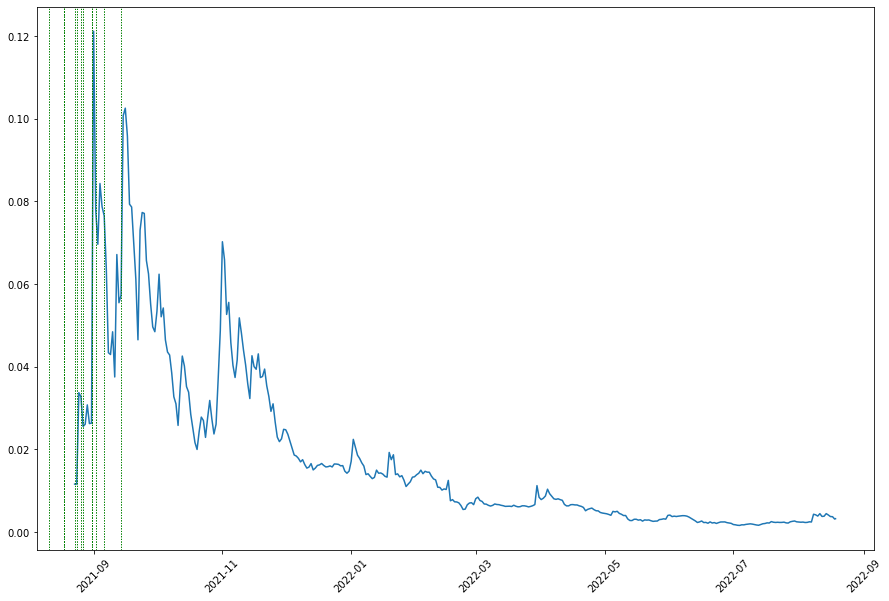

In [190]:
fig, ax = plt.subplots(figsize=(15,10))

_ = ax.plot(time, price)
_ = plt.xticks(rotation=45)

for sell in sells:
    _ = plt.axvline(x=pd.to_datetime(sell), color='green', linestyle='dotted', linewidth=1)

### Twitter Analysis

In [127]:
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

['config.ini']

In [191]:
api = tweepy.API(auth)
users = api.search_users('DoontBuy')

users[0].id
users[0].id_str
users[0].name
users[0].location
users[0].screen_name

1425651913895333896

'1425651913895333896'

'DBUY'

't.me/DoontBuy'

'DoontBuy'

In [192]:
users = api.search_users('DoontBuy')
timestamp = []
text = []
iter_num = 0

while True:
    iter_num += 1
    if iter_num == 1:
        tweets = api.user_timeline(user_id=users[0].id, 
                               # 200 is the maximum allowed count
                               count=200,
                               exclude_replies = True,
                               include_rts = False,
                               # Necessary to keep full_text 
                               # otherwise only the first 140 words are extracted
                               tweet_mode = 'extended'
                           )
    else:
        tweets = api.user_timeline(user_id=users[0].id, 
                                   # 200 is the maximum allowed count
                                   count=200,
                                   exclude_replies = True,
                                   include_rts = False,
                                   max_id = oldest_id - 1,
                                   # Necessary to keep full_text 
                                   # otherwise only the first 140 words are extracted
                                   tweet_mode = 'extended'
                               )
    if len(tweets) == 0: break
    
    for tweet in tweets:
        timestamp.append(tweet.created_at)
        text.append(tweet.full_text)
    
    oldest_id = tweets[-1].id
    print(f'the number of tweets: {len(tweets)}')

the number of tweets: 102
the number of tweets: 27


In [193]:
dft = pd.DataFrame({'timestamp':timestamp, 'text':text})
tweet_num = dft.shape[0]
dft['timestamp'] = pd.to_datetime(dft['timestamp'])
dft = dft.loc[[True if re.search('listing', i) else False for i in dft['text']]]
dft

,timestamp,text
69,2021-11-01 14:05:18+00:00,Thank you @Hoo_exchange for listing $DBUY.\nThis is just the beginning 🚀 https://t.co/f9CE8ZNz8X
83,2021-10-27 02:31:09+00:00,BREAKING NEWS\n\nWe are extremely excited to announce our listing application with @shibaswap po...


In [197]:
contractAddress = '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782'
dex = 'uniswapv2_ethereum'
csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 

csv['priceUSD'] = csv['priceUSD'].astype('float')
csv['date'] = pd.to_datetime(csv['date'])
csv.sort_values(['date'], ascending=True, inplace=True)
price = csv['priceUSD'].values
date = csv['date'].values

buys = dfs.loc[dfs['buy'] > 0, 'timestamp'].dt.strftime('%Y-%m-%d').values
sells = dfs.loc[dfs['buy'] < 0, 'timestamp'].dt.strftime('%Y-%m-%d').values
listings = dft['timestamp'].dt.strftime('%Y-%m-%d').values

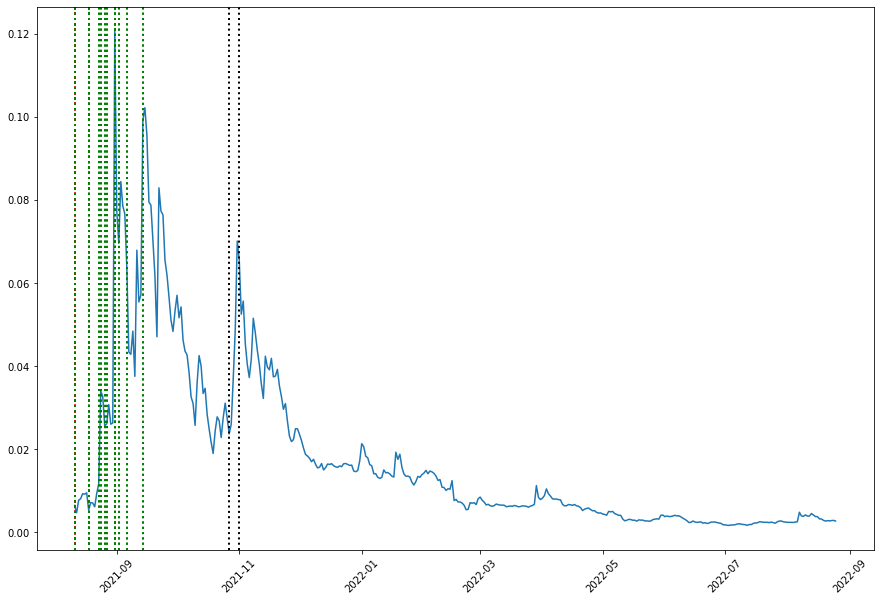

In [201]:
fig, ax = plt.subplots(figsize=(15,10))

_ = ax.plot(date, price)
_ = plt.xticks(rotation=45)

for buy in buys:
    _ = plt.axvline(x=pd.to_datetime(buy), color='red', linestyle='dotted', linewidth=2)
    
for sell in sells:
    _ = plt.axvline(x=pd.to_datetime(sell), color='green', linestyle='dotted', linewidth=2)
    
for listing in listings:
    _ = plt.axvline(x=pd.to_datetime(listing), color='black', linestyle='dotted', linewidth=2)
    
plt.show()

### Layer One

In [202]:
df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy_ret.csv')
layer_one = '0xef9af9a202ab400863dd0615b216d9a8c9fc17f5'
df.loc[df['insider_layer_one'] == layer_one]

/tmp/ipykernel_166272/2016843297.py:1: DtypeWarning: Columns (4,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy_ret.csv')


,Unnamed: 0,amountUSD,id,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,amount0Out,amount0In,amount1Out,amount1In,home_token,dex,chain,insider_layer_one,insider_contractAddress,from,to,lp,buy,ret_1,ret_2,ret_3,ret_-1,ret_-2,ret_-3
9720,11075,2263.838465,0x4ec407b32a39b13df47d0a0d6166270815d4961f0baebe4b5a16bc29dfc0a3d1-0,278,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-12 16:18:05,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x4ec407b32a39b13df47d0a0d6166270815d4961f0baebe4b5a16bc29dfc0a3d1,500000.000000,0.000000,0.000000,0.750032,True,uniswapv2_ethereum,ethereum,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,False,2263.838465,0.497458,0.546467,0.684520,NaN,NaN,NaN
9721,11076,450.710211,0x5910910985271fef2e4a3098b1268cfc76699723d1b88bb6ca82c6dff2f35c68-0,115,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-11 13:13:44,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5910910985271fef2e4a3098b1268cfc76699723d1b88bb6ca82c6dff2f35c68,935737.365552,0.000000,0.000000,0.140000,True,uniswapv2_ethereum,ethereum,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,False,450.710211,-0.321556,0.175902,0.224911,NaN,NaN,NaN
9722,11077,1077.364391,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57-0,124,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-18 10:51:34,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57,0.000000,174985.522666,0.354481,0.000000,True,uniswapv2_ethereum,ethereum,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False,-1077.364391,0.291546,0.278823,0.136338,0.036768,0.023575,0.161627
9723,11078,4964.399689,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57-1,129,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-18 10:51:34,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57,0.000000,810000.000000,1.633416,0.000000,True,uniswapv2_ethereum,ethereum,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False,-4964.399689,0.291546,0.278823,0.136338,0.036768,0.023575,0.161627
9724,11079,1656.930526,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c-0,239,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-12 01:18:57,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c,0.000000,285686.928382,0.519685,0.000000,True,uniswapv2_ethereum,ethereum,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,False,-1656.930526,0.497458,0.546467,0.684520,NaN,NaN,NaN
9725,11080,3632.976370,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c-1,244,NaN,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,NaN,2021-08-12 01:18:57,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c,0.000000,630000.000000,1.139458,0.000

#### Insider_trading

In [203]:
chain = 'ethereum'
dfs = []
for dex in chain_info(chain):
    dex
    try:
        df = insider_transaction(address=layer_one,
                                 dex=dex)
        df['dex'] = dex
        df['chain'] = chain
        dfs.append(df)
        print(f'{dex} have {len(df)} swap records.')
    except Exception as e:
        print(f'{dex} no swap records.')
        
if len(dfs)!=0: 
    dfs = pd.concat(dfs)
else: 
    print(f'No swap data')
    
dfs

'uniswapv3_ethereum'

uniswapv3_ethereum no swap records.


'uniswapv2_ethereum'

uniswapv2_ethereum have 13 swap records.


'sushiswap_ethereum'

sushiswap_ethereum no swap records.


,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain
0,0.097019156277025076,0,1708764131.710135816,20000700000,203.6873297987754473741005353501741,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x1452ef9951bc216a0af7ceeca525d9655714dd4b86bd2defa2e7e8790ce928bb-0,90,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,2021-07-13 17:22:34,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Wrapped Ether,Heal Inu,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xfb92a127ea3ad0b7f4ba404e2f6e0f5e987e4889,0x1452ef9951bc216a0af7ceeca525d9655714dd4b86bd2defa2e7e8790ce928bb,uniswapv2_ethereum,ethereum
1,0,228632.633644487,0.5,0,1284.984970040896118883883304803211,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x1b392840c46c2e096b4975eb96c3733bbb11b85ce5d57c4dd55993c27e4f5841-0,117,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,2021-08-03 02:02:25,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Mimetic,Wrapped Ether,0x4ebf13fe94c8c556c71e5563aea524c69cab2814,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1b392840c46c2e096b4975eb96c3733bbb11b85ce5d57c4dd55993c27e4f5841,uniswapv2_ethereum,ethereum
2,0,500000,0.750031799487298056,0,2263.838465265406965626027677391717,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ec407b32a39b13df47d0a0d6166270815d4961f0baebe4b5a16bc29dfc0a3d1-0,278,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,2021-08-12 16:18:05,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x4ec407b32a39b13df47d0a0d6166270815d4961f0baebe4b5a16bc29dfc0a3d1,uniswapv2_ethereum,ethereum
3,0,935737.365551998,0.14,0,450.7102109473961201133044675293188,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x5910910985271fef2e4a3098b1268cfc76699723d1b88bb6ca82c6dff2f35c68-0,115,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,2021-08-11 13:13:44,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5910910985271fef2e4a3098b1268cfc76699723d1b88bb6ca82c6dff2f35c68,uniswapv2_ethereum,ethereum
4,14850,0,0,0.03451358561520676,87.14422827770759534939873469824386,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x71ab14aa359077619bf03d446fbe114fc2c95ee645114bb310a1db9ee89c5b94-0,266,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-03 14:26:59,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Mimetic,Wrapped Ether,0x4ebf13fe94c8c556c71e5563aea524c69cab2814,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x71ab14aa359077619bf03d446fbe114fc2c95ee645114bb310a1db9ee89c5b94,uniswapv2_ethereum,ethereum
5,159408.388001436,0,0,0.365075302398097566,916.1821828475062858030530736854864,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x71ab14aa359077619bf03d446fbe114fc2c95ee645114bb310a1db9ee89c5b94-1,272,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-03 14:26:59,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Mimetic,Wrapped Ether,0x4ebf13fe94c8c556c71e5563aea524c69cab2814,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x71ab14aa359077619bf03d446fbe114fc2c95ee645114bb310a1db9ee89c5b94,uniswapv2_ethereum,ethereum
6,1,0,0,40132413425.136965102600981974,3188.38604281100600971637202015438,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x86bf06deb0cf2743f1e9f7fbd726b23ea7937d3cd49e2712388e99655132f649-0,51,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,2021-08-12 01:20:09,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Wrapped Ether,Super Heavy Booster 5 | https://t.me/superheavybooster5,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xd6daecbba57eae35026a92b972e731932b0434a5,0x86bf06deb0cf2743f1e9f7fbd726b23ea7937d3cd49e2712388e99655132f649,uniswapv2_ethereum,ethereum
7,35250208437552.109388028,0,0,2.350013722627658498,4314.980291886965251222183990050389,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x8ef14c13ca2b44a6921f0b74edc2af3f4574d27444e404bc4ad9c7663f08c272-0,43,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-07-14 11:56:22,0x7a250d5630b4cf539739df2c5dacb4c659

#### Home Token

In [204]:
dfs = home_token_filter(df=dfs,
                        insider_contractAddress='0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782')
dfs = dfs.loc[dfs['home_token'] == True]
dfs

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,from,id,logIndex,to,timestamp,sender,token0_name,token1_name,token0_id,token1_id,transaction_id,dex,chain,home_token
2,0,500000,0.750031799487298056,0,2263.838465265406965626027677391717,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x4ec407b32a39b13df47d0a0d6166270815d4961f0baebe4b5a16bc29dfc0a3d1-0,278,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,2021-08-12 16:18:05,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x4ec407b32a39b13df47d0a0d6166270815d4961f0baebe4b5a16bc29dfc0a3d1,uniswapv2_ethereum,ethereum,True
3,0,935737.365551998,0.14,0,450.7102109473961201133044675293188,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x5910910985271fef2e4a3098b1268cfc76699723d1b88bb6ca82c6dff2f35c68-0,115,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,2021-08-11 13:13:44,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5910910985271fef2e4a3098b1268cfc76699723d1b88bb6ca82c6dff2f35c68,uniswapv2_ethereum,ethereum,True
8,174985.522665557,0,0,0.354480847005776848,1077.364391424402144943034032058247,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57-0,124,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-18 10:51:34,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57,uniswapv2_ethereum,ethereum,True
9,810000,0,0,1.633416345052815156,4964.399688713841516498036818926348,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57-1,129,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-18 10:51:34,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57,uniswapv2_ethereum,ethereum,True
10,285686.928382417,0,0,0.519684881367630792,1656.930525902084782204971109035481,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c-0,239,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-12 01:18:57,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c,uniswapv2_ethereum,ethereum,True
11,630000,0,0,1.139458091054098442,3632.976370382533715549739783687621,0xef9af9a202ab400863dd0615b216d9a8c9fc17f5,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c-1,244,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,2021-08-12 01:18:57,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,Doont Buy,Wrapped Ether,0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c,uniswapv2_ethereum,ethereum,True


#### Liquidity Provision

In [208]:
total = dfs.shape[0]
num = 0
dfs['lp'] = np.nan

for idx, row in dfs.iterrows():
    num += 1
    
    transaction_id = row['transaction_id']
    chain = row['chain']
    try:
        status = liquidity_provision(transaction_id, chain)
        if status == True:
            dfs.loc[dfs['transaction_id'] == transaction_id, 'lp'] = True
            print(f'{transaction_id} is lp, {num}/{total}.')

        else:
            dfs.loc[dfs['transaction_id'] == transaction_id, 'lp'] = False
            print(f'{transaction_id} is not lp, {num}/{total}.')
    except Exception as e:
        print(f'error:{e}')

/tmp/ipykernel_166272/598886098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['lp'] = np.nan
/tmp/ipykernel_166272/598886098.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.loc[dfs['transaction_id'] == transaction_id, 'lp'] = False


0x4ec407b32a39b13df47d0a0d6166270815d4961f0baebe4b5a16bc29dfc0a3d1 is not lp, 1/6.
0x5910910985271fef2e4a3098b1268cfc76699723d1b88bb6ca82c6dff2f35c68 is not lp, 2/6.
0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57 is not lp, 3/6.
0x940751ffd715089aae3a273efb9a022341f765b4041efb253c395ad233751e57 is not lp, 4/6.
0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c is not lp, 5/6.
0xa7d56134ead4b879f0d8ea0ae2817e6654271100db84ba2a93fd75568eed6d1c is not lp, 6/6.


In [218]:
dfs = dfs.loc[dfs['lp'] == False]

#### Variables

In [223]:
for key in ['amount0In', 'amount0Out', 'amount1In', 'amount1Out', 'amountUSD']:
    dfs[key] = dfs[key].astype('float')
dfs['insider_contractAddress'] = '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782'

dfs = set_buy(df=dfs)

In [227]:
for after in [True, False]:
    for day in [1, 2, 3]:
        if after == True: dfs[f'ret_{str(day)}'] = np.nan
        if after == False: dfs[f'ret_-{str(day)}'] = np.nan
total = dfs.shape[0]
num = 0

for idx, row in dfs.iterrows():
    try:
        num += 1
        insider_contractAddress = row['insider_contractAddress']
        timestamp = row['timestamp']
        index = row['id']
        chain = row['chain']
        print(f'{num}/{total}')
        for after in [True, False]:
            for day in [1, 2, 3]:
                
                if after == True: dfs.loc[dfs['id'] == index, f'ret_{str(day)}'] = token_return(after=after, 
                                                                                              day=day, 
                                                                                              contract=insider_contractAddress, 
                                                                                              chain=chain,
                                                                                              timestamp=timestamp)
                if after == False: dfs.loc[dfs['id'] == index, f'ret_-{str(day)}'] = token_return(after=after, 
                                                                                              day=day, 
                                                                                              contract=insider_contractAddress, 
                                                                                              chain=chain,
                                                                                              timestamp=timestamp)
    except Exception as e:
        print(f'{num}/{total}:Error{e}')

1/6
2/6
3/6
4/6
5/6
6/6


#### Return Analysis

6

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([-0.3215562 , -0.31336605, -0.30517591, -0.29698576, -0.28879562,
        -0.28060547, -0.27241533, -0.26422518, -0.25603504, -0.24784489,
        -0.23965475, -0.2314646 , -0.22327446, -0.21508431, -0.20689417,
        -0.19870403, -0.19051388, -0.18232374, -0.17413359, -0.16594345,
        -0.1577533 , -0.14956316, -0.14137301, -0.13318287, -0.12499272,
        -0.11680258, -0.10861243, -0.10042229, -0.09223214, -0.084042  ,
        -0.07585185, -0.06766171, -0.05947156, -0.05128142, -0.04309127,
        -0.03490113, -0.02671098, -0.01

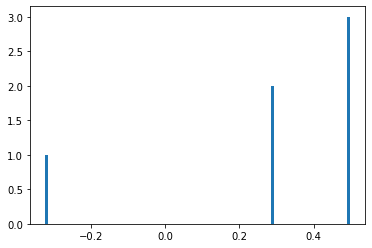

count    6.000000
mean     0.292318
std      0.317204
min     -0.321556
25%      0.291546
50%      0.394502
75%      0.497458
max      0.497458
Name: ret_1, dtype: float64

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.3215562 , -0.31336605, -0.30517591, -0.29698576, -0.28879562,
        -0.28060547, -0.27241533, -0.26422518, -0.25603504, -0.24784489,
        -0.23965475, -0.2314646 , -0.22327446, -0.21508431, -0.20689417,
        -0.19870403, -0.19051388, -0.18232374, -0.17413359, -0.16594345,
        -0.1577533 , -0.14956316, -0.14137301, -0.13318287, -0.12499272,
        -0.11680258, -0.10861243, -0.10042229, -0.09223214, -0.084042  ,
        -0.07585185, -0.06766171, -0.05947156, -0.05128142, -0.04309127,
        -0.03490113, -0.02671098, -0.01

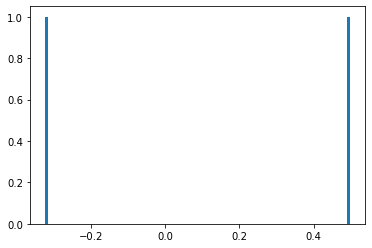

count    2.000000
mean     0.087951
std      0.579131
min     -0.321556
25%     -0.116803
50%      0.087951
75%      0.292705
max      0.497458
Name: ret_1, dtype: float64

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0.29154583, 0.29360496, 0.29566408, 0.29772321, 0.29978233,
        0.30184145, 0.30390058, 0.3059597 , 0.30801883, 0.31007795,
        0.31213708, 0.3141962 , 0.31625533, 0.31831445, 0.32037358,
        0.3224327 , 0.32449182, 0.32655095, 0.32861007, 0.3306692 ,
        0.33272832, 0.33478745, 0.33684657, 0.3389057 , 0.34096482,
        0.34302394, 0.34508307, 0.34714219, 0.34920132, 0.35126044,
        0.35331957, 0.35537869, 0.35743782, 0.35949694, 0.36155606,
        0.36361519, 0.36567431, 0.36773344, 0.36979256, 0.37185169,
      

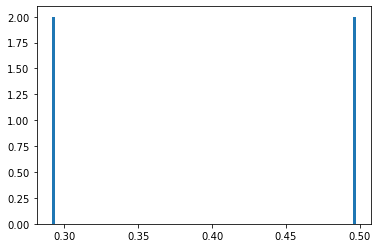

count    4.000000
mean     0.394502
std      0.118884
min      0.291546
25%      0.291546
50%      0.394502
75%      0.497458
max      0.497458
Name: ret_1, dtype: float64

In [228]:
ret_class = 'ret_1'

dfg = dfs.copy()
dfg.shape[0]
fig, ax = plt.subplots()
ax.hist(dfg[ret_class].values, bins=100)
plt.show()
dfg[ret_class].describe()

dfg = dfs.loc[(dfs['buy']>0)]
buy = dfg['buy'].values
ret = dfg[ret_class].values
fig, ax = plt.subplots()
ax.hist(ret,bins=100)
plt.show()
dfs.loc[(dfs['buy'] >0)][ret_class].describe()

dfg = dfs.loc[(dfs['buy']<0)]
buy = dfg['buy'].values
ret = dfg[ret_class].values
fig, ax = plt.subplots()
ax.hist(ret,bins=100)
plt.show()
dfs.loc[(dfs['buy'] <0)][ret_class].describe()

In [229]:
contractAddress = '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782'
dex = 'uniswapv2_ethereum'
csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 

csv['priceUSD'] = csv['priceUSD'].astype('float')
csv['date'] = pd.to_datetime(csv['date'])
csv.sort_values(['date'], ascending=True, inplace=True)
price = csv['priceUSD'].values
date = csv['date'].values

buys = dfs.loc[dfs['buy'] > 0, 'timestamp'].dt.strftime('%Y-%m-%d').values
sells = dfs.loc[dfs['buy'] < 0, 'timestamp'].dt.strftime('%Y-%m-%d').values

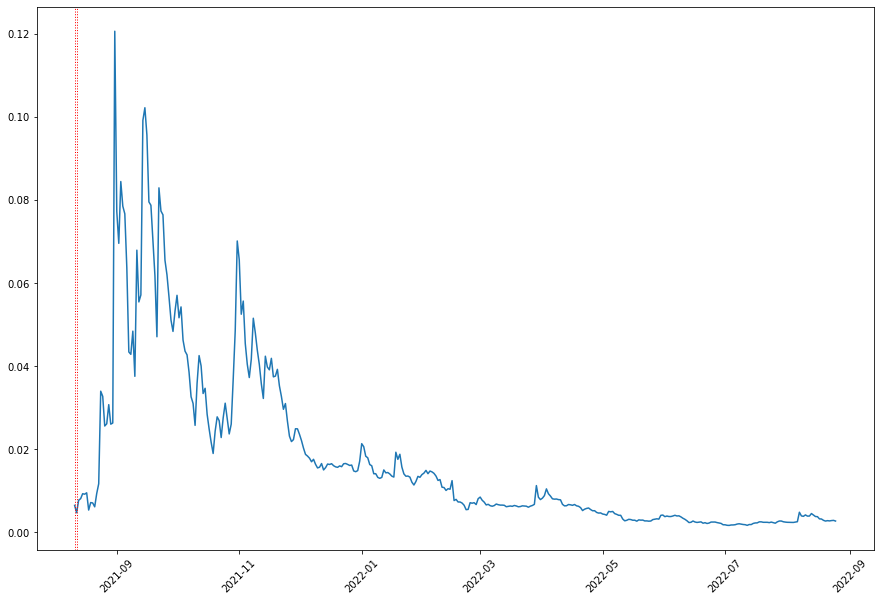

In [230]:
fig, ax = plt.subplots(figsize=(15,10))

_ = ax.plot(date, price)
_ = plt.xticks(rotation=45)

for buy in buys:
    _ = plt.axvline(x=pd.to_datetime(buy), color='red', linestyle='dotted', linewidth=1)
     
plt.show()

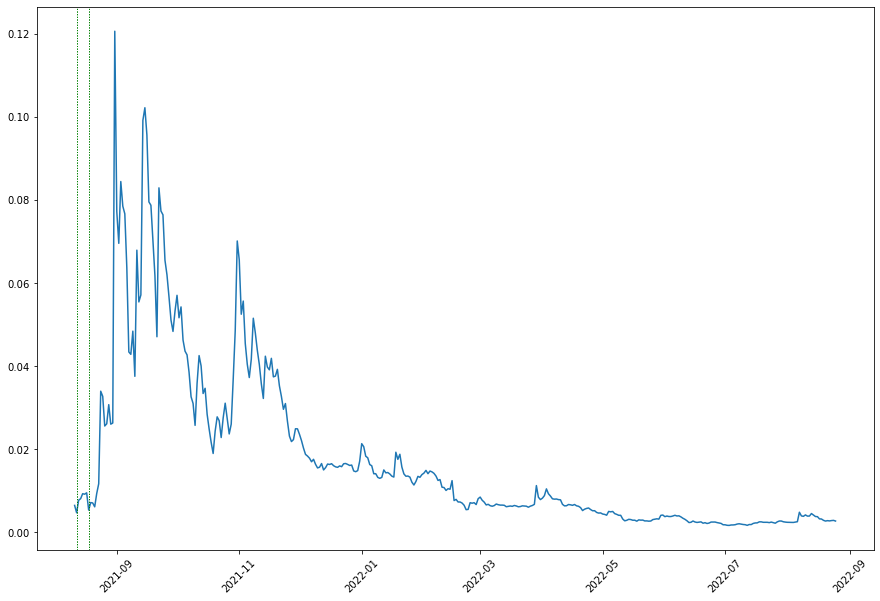

In [231]:
fig, ax = plt.subplots(figsize=(15,10))

_ = ax.plot(date, price)
_ = plt.xticks(rotation=45)

for sell in sells:
    _ = plt.axvline(x=pd.to_datetime(sell), color='green', linestyle='dotted', linewidth=1)

## Tweet Analysis

In [232]:
contractAddress = '0x4ece5c5cfb9b960a49aae739e15cdb6cfdcc5782'
dex = 'uniswapv2_ethereum'
csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 

csv['priceUSD'] = csv['priceUSD'].astype('float')
csv['date'] = pd.to_datetime(csv['date'])
csv.sort_values(['date'], ascending=True, inplace=True)
price = csv['priceUSD'].values
date = csv['date'].values

buys = dfs.loc[dfs['buy'] > 0, 'timestamp'].dt.strftime('%Y-%m-%d').values
sells = dfs.loc[dfs['buy'] < 0, 'timestamp'].dt.strftime('%Y-%m-%d').values
listings = dft['timestamp'].dt.strftime('%Y-%m-%d').values

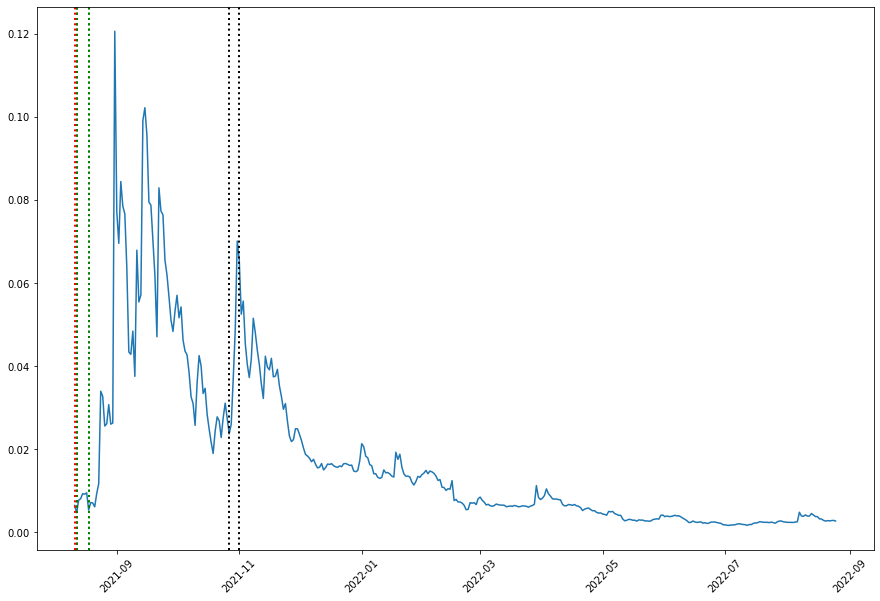

In [233]:
fig, ax = plt.subplots(figsize=(15,10))

_ = ax.plot(date, price)
_ = plt.xticks(rotation=45)

for buy in buys:
    _ = plt.axvline(x=pd.to_datetime(buy), color='red', linestyle='dotted', linewidth=2)
    
for sell in sells:
    _ = plt.axvline(x=pd.to_datetime(sell), color='green', linestyle='dotted', linewidth=2)
    
for listing in listings:
    _ = plt.axvline(x=pd.to_datetime(listing), color='black', linestyle='dotted', linewidth=2)
    
plt.show()

# Function

In [14]:
def insider_transaction(address, dex):
    

    dfs = []
    for role in dex_info(dex)['role']:

        post = {"query":dex_info(dex)['post'].substitute({'role': role, 'address':address})}
        url = dex_info(dex)['url']

        r = requests.post(url, json=post)
        data = r.json()
        df = pd.DataFrame.from_dict(data['data']['swaps'])

        if df.shape[0] == 0:
            continue

        if dex_info(dex)['style'] == 0:
            df['token0_name'] = df['token0'].apply(lambda x: x['name'])
            df['token1_name'] = df['token1'].apply(lambda x: x['name'])
            df['token0_id'] = df['token0'].apply(lambda x: x['id'])
            df['token1_id'] = df['token1'].apply(lambda x: x['id'])
            df['transaction_id'] = df['transaction'].apply(lambda x: x['id'])
            df.drop(columns=['token0', 'token1', 'transaction'], inplace=True)
        else:
            if dex_info(dex)['style'] == 1:
                df['token0_name'] = df['pair'].apply(lambda x: x['token0']['name'])
                df['token1_name'] = df['pair'].apply(lambda x: x['token1']['name'])
                df['token0_id'] = df['pair'].apply(lambda x: x['token0']['id'])
                df['token1_id'] = df['pair'].apply(lambda x: x['token1']['id'])
                df['transaction_id'] = df['transaction'].apply(lambda x: x['id'])
                df.drop(columns=['pair', 'transaction'], inplace=True)
        
        df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s', origin='unix')
        
        if dex == 'uniswapv3_ethereum': df = uniswapv3_correction(df)
        
        df = df.loc[df[role] == address]
        if df.shape[0] == 0:
            continue

        dfs.append(df)

    if len(dfs) != 0: 
        dfs = pd.concat(dfs)
        dfs.drop_duplicates('id', inplace=True)

    return dfs

In [15]:
def uniswapv3_correction(df):
    
    df['amount0'] = df['amount0'].astype('float')
    df['amount1'] = df['amount1'].astype('float')
    for idx, row in df.iterrows():
        if row['amount0'] > 0:
            df.loc[df['id'] == row['id'], 'amount0Out'] = 0
            df.loc[df['id'] == row['id'], 'amount0In'] = abs(row['amount0'])
            df.loc[df['id'] == row['id'], 'amount1Out'] = abs(row['amount1'])
            df.loc[df['id'] == row['id'], 'amount1In'] = 0

        else:
            df.loc[df['id'] == row['id'], 'amount0Out'] = abs(row['amount0'])
            df.loc[df['id'] == row['id'], 'amount0In'] = 0
            df.loc[df['id'] == row['id'], 'amount1Out'] = 0
            df.loc[df['id'] == row['id'], 'amount1In'] = abs(row['amount1'])
    df.drop(columns=['amount1', 'amount0'], inplace=True)
    return df

In [16]:
def home_token_filter(df, insider_contractAddress):
    df['home_token'] = False
    df.loc[(df['token0_id'] == insider_contractAddress)|(df['token1_id'] == insider_contractAddress), 'home_token'] = True
    return df

In [207]:
def liquidity_provision(transaction_id, chain):
    
    t.sleep(random.random() * 2)
    headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36'}

    if chain == 'ethereum': url = f'https://etherscan.io/tx/{transaction_id}'
    if chain == 'binance' : url = f'https://bscscan.com/tx/{transaction_id}'
    if chain == 'avalanche': url = f'https://snowtrace.io/tx/{transaction_id}'
    if chain == 'polygon' : url = f'https://polygonscan.com/tx/{transaction_id}'
    if chain == 'fantom' : url = f'https://ftmscan.com/tx/{transaction_id}'

    r = requests.get(url, headers=headers)
    if re.search('liquidity to', r.text.lower()) != None:
        return True
    else:
        return False

In [20]:
def dex_info(dex):
    dex_infos = {
                'uniswapv3_ethereum':{'url': 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswap-v3-subgraph',
                                       'role': 1,
                                       'style': 0,
                                       'post': 1
                                      },
                
                'uniswapv2_ethereum':{'url': 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswapv2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'sushiswap_ethereum':{'url': 'https://api.thegraph.com/subgraphs/name/sushiswap/exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },
        
                'pancake_binance':{'url': 'https://bsc.streamingfast.io/subgraphs/name/pancakeswap/exchange-v2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'biswap_binance':{'url': 'https://api.thegraph.com/subgraphs/name/biswapcom/exchange5',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'apeswap_binance':{'url': 'https://graph2.apeswap.finance/subgraphs/name/ape-swap/apeswap-subgraph',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'babyswap_binance':{'url': 'https://api.thegraph.com/subgraphs/name/loremboard/bsc-babyswap-subgraph',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'jetswap_binance':{'url': 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-v2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'traderjoe_avalanche':{'url': 'https://api.thegraph.com/subgraphs/name/traderjoe-xyz/exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      }, 
        
                'pangolin_avalanche':{'url': 'https://api.thegraph.com/subgraphs/name/dasconnor/pangolin-dex',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },  
        
                'spookyswap_fantom':{'url': 'https://api.thegraph.com/subgraphs/name/int3grtor/spooky-exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },  
        
                'spiritswap_fantom':{'url': 'https://api.thegraph.com/subgraphs/name/evele/spirit-swap-subgraph-dev-v2',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },  
        
                'sushiswap_polygon':{'url': 'https://api.thegraph.com/subgraphs/name/sushiswap/matic-exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },
        
                'apeswap_polygon':{'url': 'https://api.thegraph.com/subgraphs/name/apeswapfinance/dex-polygon',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'jetswap_polygon':{'url': 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-polygon-v2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
                }
    
    roles = [['from', 'to', 'sender'],
             ['origin', 'recipient', 'sender'],
             ['sender', 'to']]
    
    url = dex_infos[dex]['url']
    role = roles[dex_infos[dex]['role']]
    style = dex_infos[dex]['style']
    post = dex_infos[dex]['post']
    
    info = {'url':url,
            'post':post_string(post),
            'role':role,
            'style':style
           }

    return info

In [19]:
def post_string(post):
    if post == 0:
        query = string.Template("""query MyQuery {
  swaps(first: 1000, where: {$role: "$address"}) {
    amount0In
    amount0Out
    amount1In
    amount1Out
    amountUSD
    from
    id
    logIndex
    to
    timestamp
    sender
    pair {
      token0 {
        id
        name
      }
      token1 {
        id
        name
      }
    }
    transaction {
      id
    }
  }
}""")
        
    if post == 1:
        query = string.Template("""query MyQuery {
  swaps(first: 1000, where: {$role: "$address"}) {
    amount0
    amount1
    amountUSD
    id
    logIndex
    origin
    recipient
    sender
    sqrtPriceX96
    tick
    timestamp
    token0 {
      id
      name
    }
    token1 {
      id
      name
    }
    transaction {
      id
    }
  }
}""")
        
    if post == 2:
        query = string.Template("""query MyQuery {
  swaps(first: 1000, where: {$role: "$address"}) {
    amount0In
    amount0Out
    amount1In
    amount1Out
    amountUSD
    id
    logIndex
    sender
    timestamp
    to
    pair {
      token0 {
        id
        name
      }
      token1 {
        id
        name
      }
    }
    transaction {
      id
    }
  }
}""")
    return query

In [24]:
def chain_info(chain):
    dexes = {'ethereum':['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
             'binance':['pancake_binance', 'biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
             'avalanche':['traderjoe_avalanche', 'pangolin_avalanche'],
             'fantom':['spookyswap_fantom', 'spiritswap_fantom'],
             'polygon':['sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']
            }
    
    dex = dexes[chain]
    return dex

In [222]:
def set_buy(df):

    
    for idx, row in df.iterrows():
        index = row['id']
        insider_contractAddress = row['insider_contractAddress']
        token0_id = row['token0_id']
        token1_id = row['token1_id']

        amount0Out = row['amount0Out']
        amount0In = row['amount0In']
        amount1Out = row['amount1Out']
        amount1In = row['amount1In']
        amountUSD = row['amountUSD']

        if insider_contractAddress == token0_id:
            if (amount0In == 0)|(amount1Out == 0):
                df.loc[df['id'] == index, 'buy'] = amountUSD
            else:
                df.loc[df['id'] == index, 'buy'] = - amountUSD

        else:
            if (amount0In == 0)|(amount1Out == 0):
                df.loc[df['id'] == index, 'buy'] = - amountUSD
            else:
                df.loc[df['id'] == index, 'buy'] = amountUSD
            
    return df

In [71]:
def token_dollar_price(contract, chain, timestamp):
    
        contractAddress_lower = contract.lower()
        contractAddress_upper = Web3.toChecksumAddress(contractAddress_lower)

        date = timestamp.strftime('%Y-%m-%d')
        
        priceUSD = 0
        dex_num = 0
        avg_priceUSD = 0

        for dex in chain_info(chain):
            lst = pd.read_csv(f'{WD}/dex_price/list_all/{dex}.csv')
            csv_info = lst.loc[((lst['contractAddress'] == contractAddress_lower)|
                                (lst['contractAddress'] == contractAddress_upper))]
            
            if csv_info['contractAddress'].values[0] == contractAddress_lower:
                contractAddress = contractAddress_lower
            else:
                contractAddress = contractAddress_upper

            status = csv_info['status'].values[0]
            dexn = csv_info['dex'].values[0]

            if status == 0: 
                continue
            elif dexn == 0:
                continue
            else:
                csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 
                price_info = csv.loc[(pd.to_datetime(csv['date']) > pd.to_datetime(timestamp) - datetime.timedelta(days=1))&
                                  (pd.to_datetime(csv['date']) < pd.to_datetime(timestamp))]
                
                if price_info.shape[0] != 0:
                    price = price_info['priceUSD'].values[0]
                    if price != 0:  
                        priceUSD += price
                        dex_num += 1

        if dex_num != 0: 
            return priceUSD/dex_num
        if dex_num == 0:
            return 0
        
def token_dollar_price_date(contract, chain, date):
    
        contractAddress_lower = contract.lower()
        contractAddress_upper = Web3.toChecksumAddress(contractAddress_lower)
        
        priceUSD = 0
        dex_num = 0
        avg_priceUSD = 0

        for dex in chain_info(chain):
            lst = pd.read_csv(f'{WD}/dex_price/list_all/{dex}.csv')
            csv_info = lst.loc[((lst['contractAddress'] == contractAddress_lower)|
                                (lst['contractAddress'] == contractAddress_upper))]
            
            if csv_info['contractAddress'].values[0] == contractAddress_lower:
                contractAddress = contractAddress_lower
            else:
                contractAddress = contractAddress_upper

            status = csv_info['status'].values[0]
            dexn = csv_info['dex'].values[0]

            if status == 0: 
                continue
            elif dexn == 0:
                continue
            else:
                csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 
                price_info = csv.loc[(pd.to_datetime(csv['date']) == pd.to_datetime(date))]
                
                if price_info.shape[0] != 0:
                    price = price_info['priceUSD'].values[0]
                    if price != 0:  
                        priceUSD += price
                        dex_num += 1

        if dex_num != 0: 
            return priceUSD/dex_num
        if dex_num == 0:
            return 0

In [72]:
def token_return(after, day, contract, chain, timestamp):
    if after == True:
        start_date = pd.to_datetime(timestamp)
        end_date = pd.to_datetime(timestamp) + datetime.timedelta(days=day)
        
        start_price = token_dollar_price(contract=contract, chain=chain, timestamp=start_date)
        end_price = token_dollar_price(contract=contract, chain=chain, timestamp=end_date)
        
    else:
        start_date = pd.to_datetime(timestamp) - datetime.timedelta(days=day+1)
        end_date = pd.to_datetime(timestamp) - datetime.timedelta(days=1)
        
        start_price = token_dollar_price(contract=contract, chain=chain, timestamp=start_date)
        end_price = token_dollar_price(contract=contract, chain=chain, timestamp=end_date)
    
    if (end_price == 0)|(start_price==0):
        return np.nan
    else:
        return np.log(end_price/start_price)
    
def token_return_date(after, day, contract, chain, date):
    if after == True:
        start_date = pd.to_datetime(date)
        end_date = pd.to_datetime(date) + datetime.timedelta(days=day)
        
        start_price = token_dollar_price_date(contract=contract, chain=chain, date=start_date)
        end_price = token_dollar_price_date(contract=contract, chain=chain, date=end_date)
        
    else:
        start_date = pd.to_datetime(date) - datetime.timedelta(days=day+1)
        end_date = pd.to_datetime(date) - datetime.timedelta(days=1)
        
        start_price = token_dollar_price_date(contract=contract, chain=chain, date=start_date)
        end_price = token_dollar_price_date(contract=contract, chain=chain, date=end_date)
    
    if (end_price == 0)|(start_price==0):
        return np.nan
    else:
        return np.log(end_price/start_price)